## An introduction to reinforcement learning

## Supervised Learning

$$ \{x, y\}, f(\vec{x}; \theta) = y $$

$$ given \ x, \forall \theta, f(\vec{x}; \theta)， get \ a \ loss, to\  evaluate \theta $$

## Unsupervised Learning

$$ given \{  \vec{x_0}, \vec{x_1}, .., \vec{x_n}\}, without \ labels $$

$$ get \ the \ N  \ clusters \$$

## Reinforcement Learning

+ Long-term value
+ decision making

+ Agent
+ State
+ Action
+ $ \sum {reward_i} $

1. 复杂的states的时候，state怎么表征？ 
2. reward 怎么定义？ 

### Q-Learning (quality)

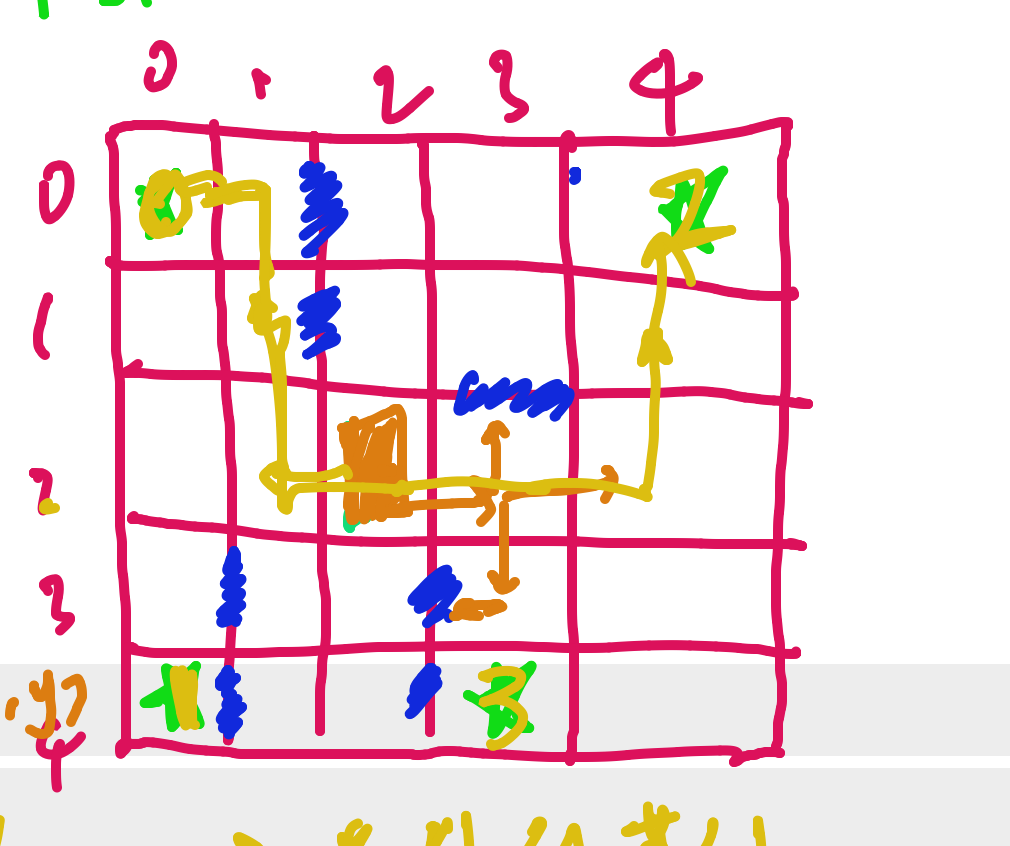

In [2]:
import gym

In [3]:
env = gym.make('Taxi-v3').env

In [4]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
env.reset()

186

In [12]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



+ 0 Down
+ 1 Up
+ 2 Right
+ 3 Left
+ 4 Pickup
+ 5 Dropoff

In [13]:
env.step(0)

(286, -1, False, {'prob': 1.0})

In [14]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


In [19]:
import tqdm

In [20]:
import time

In [21]:
for _ in tqdm.tqdm_notebook(range(15 * 60)):
    time.sleep(1)
    pass

In [17]:
env.P[286]

{0: [(1.0, 386, -1, False)],
 1: [(1.0, 186, -1, False)],
 2: [(1.0, 286, -1, False)],
 3: [(1.0, 266, -1, False)],
 4: [(1.0, 286, -10, False)],
 5: [(1.0, 286, -10, False)]}

In [15]:
env.step(3)

(266, -1, False, {'prob': 1.0})

In [16]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [7]:
env.action_space

Discrete(6)

$$ finding \ a \ f(state) -> action $$

In [9]:
5 * 5 * 4 * (4 + 1)

500

In [11]:
env.observation_space

Discrete(500)

In [53]:
state = env.encode(3, 1, 2, 0)

In [40]:
print('State, ', state)

State,  328


In [54]:
env.s = state

In [55]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [125]:
from collections import namedtuple

In [137]:
## <= python3.7

In [126]:
Frame = namedtuple('Frame', 'frame state action reward'.split())

In [141]:
from dataclasses import dataclass

@dataclass
class CFrame:
    frame: str
    state: int
    action: int
    reward: int
        
    def evalue_state(self, env):
        print(env.step(action))

In [132]:
done = False

epochs = 0
serious_wrong_actions = 0
frames = []

def is_serious_wrong(r): return r == -10

while not done: 
    action = env.action_space.sample() # random get an action
    state, reward, done, info = env.step(action)
    
    if is_serious_wrong(reward):
        serious_wrong_actions += 1
    
    frames.append(Frame(
        env.render(mode='ansi'),
        state,
        action,
        reward
    ))
    
    epochs += 1

print('Timesteps taken: {}'.format(epochs))
print('serious wrong actions: {}'.format(serious_wrong_actions))

Timesteps taken: 13
serious wrong actions: 2


In [133]:
from IPython.display import clear_output

In [136]:
for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame.frame)
    print(f'time-step: {i+1}')
    print(f'state: {frame.state}')
    print(f'action: {frame.action}')
    print(f'reward: {frame.reward}')
    time.sleep(.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

time-step: 13
state: 410
action: 5
reward: 20


## Q-Learning, Q is for Quality

$$ Q(state, action) <=  \alpha Q(state, action) + (1 - \alpha)\{ reward(state, action) + \gamma Max_{a_i \in Actions}(Q(next-state, a_i)) \} $$

In [67]:
import numpy as np

In [69]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [79]:
import random

In [91]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [94]:
alpha = 0.1
gamma = 0.6
epsilon = 0.2

for i in range(1, 10001):
    state = env.reset()
    
    epochs, serious_wrong, reward = 0, 0, 0
    
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        
        next_state, reward, done, info = env.step(action)
        
        old_q_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        
        new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
        
        q_table[state, action] = new_q_value
        
        if is_serious_wrong(reward):
            serious_wrong += 1
        
        state = next_state
        
        epochs += 1
        
    if i % 10 == 0:
        clear_output(wait=True)
        print(f'Eposode: {i}')
        
print('training finished!\n')  

Eposode: 10000
training finished!



In [73]:
import matplotlib.pyplot as plt

In [97]:
np.argmax(q_table[328])

1

In [99]:
env.state = 328

In [143]:
state = env.encode(3, 2, 1, 2)
env.s = state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [144]:
done = False

while not done: 
    action = np.argmax(q_table[state])
    next_s, reward, done, prob = env.step(action)
    clear_output(wait=True)
    env.render()
    #print('take action: {}'.format(action))
    state = next_s
    
    time.sleep(0.8)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
